# Introduction to Deep Gaussian Processes
### [Neil D. Lawrence](http://inverseprobability.com), University of Sheffield
### 2019-09-10

**Abstract**: In this talk we introduce deep Gaussian processes, describe what they
are and what they are good for. Deep Gaussian process models make use of
stochastic process composition to combine Gaussian processes together to
form new models which are non-Gaussian in structure. They serve both as
a theoretical model for deep learning and a functional model for
regression, classification and unsupervised learning. The challenge in
these models is propagating the uncertainty through the process.

$$
\newcommand{\tk}[1]{}
%\newcommand{\tk}[1]{\textbf{TK}: #1}
\newcommand{\Amatrix}{\mathbf{A}}
\newcommand{\KL}[2]{\text{KL}\left( #1\,\|\,#2 \right)}
\newcommand{\Kaast}{\kernelMatrix_{\mathbf{ \ast}\mathbf{ \ast}}}
\newcommand{\Kastu}{\kernelMatrix_{\mathbf{ \ast} \inducingVector}}
\newcommand{\Kff}{\kernelMatrix_{\mappingFunctionVector \mappingFunctionVector}}
\newcommand{\Kfu}{\kernelMatrix_{\mappingFunctionVector \inducingVector}}
\newcommand{\Kuast}{\kernelMatrix_{\inducingVector \bf\ast}}
\newcommand{\Kuf}{\kernelMatrix_{\inducingVector \mappingFunctionVector}}
\newcommand{\Kuu}{\kernelMatrix_{\inducingVector \inducingVector}}
\newcommand{\Kuui}{\Kuu^{-1}}
\newcommand{\Qaast}{\mathbf{Q}_{\bf \ast \ast}}
\newcommand{\Qastf}{\mathbf{Q}_{\ast \mappingFunction}}
\newcommand{\Qfast}{\mathbf{Q}_{\mappingFunctionVector \bf \ast}}
\newcommand{\Qff}{\mathbf{Q}_{\mappingFunctionVector \mappingFunctionVector}}
\newcommand{\aMatrix}{\mathbf{A}}
\newcommand{\aScalar}{a}
\newcommand{\aVector}{\mathbf{a}}
\newcommand{\acceleration}{a}
\newcommand{\bMatrix}{\mathbf{B}}
\newcommand{\bScalar}{b}
\newcommand{\bVector}{\mathbf{b}}
\newcommand{\basisFunc}{\phi}
\newcommand{\basisFuncVector}{\boldsymbol{ \basisFunc}}
\newcommand{\basisFunction}{\phi}
\newcommand{\basisLocation}{\mu}
\newcommand{\basisMatrix}{\boldsymbol{ \Phi}}
\newcommand{\basisScalar}{\basisFunction}
\newcommand{\basisVector}{\boldsymbol{ \basisFunction}}
\newcommand{\activationFunction}{\phi}
\newcommand{\activationMatrix}{\boldsymbol{ \Phi}}
\newcommand{\activationScalar}{\basisFunction}
\newcommand{\activationVector}{\boldsymbol{ \basisFunction}}
\newcommand{\bigO}{\mathcal{O}}
\newcommand{\binomProb}{\pi}
\newcommand{\cMatrix}{\mathbf{C}}
\newcommand{\cbasisMatrix}{\hat{\boldsymbol{ \Phi}}}
\newcommand{\cdataMatrix}{\hat{\dataMatrix}}
\newcommand{\cdataScalar}{\hat{\dataScalar}}
\newcommand{\cdataVector}{\hat{\dataVector}}
\newcommand{\centeredKernelMatrix}{\mathbf{ \MakeUppercase{\centeredKernelScalar}}}
\newcommand{\centeredKernelScalar}{b}
\newcommand{\centeredKernelVector}{\centeredKernelScalar}
\newcommand{\centeringMatrix}{\mathbf{H}}
\newcommand{\chiSquaredDist}[2]{\chi_{#1}^{2}\left(#2\right)}
\newcommand{\chiSquaredSamp}[1]{\chi_{#1}^{2}}
\newcommand{\conditionalCovariance}{\boldsymbol{ \Sigma}}
\newcommand{\coregionalizationMatrix}{\mathbf{B}}
\newcommand{\coregionalizationScalar}{b}
\newcommand{\coregionalizationVector}{\mathbf{ \coregionalizationScalar}}
\newcommand{\covDist}[2]{\text{cov}_{#2}\left(#1\right)}
\newcommand{\covSamp}[1]{\text{cov}\left(#1\right)}
\newcommand{\covarianceScalar}{c}
\newcommand{\covarianceVector}{\mathbf{ \covarianceScalar}}
\newcommand{\covarianceMatrix}{\mathbf{C}}
\newcommand{\covarianceMatrixTwo}{\boldsymbol{ \Sigma}}
\newcommand{\croupierScalar}{s}
\newcommand{\croupierVector}{\mathbf{ \croupierScalar}}
\newcommand{\croupierMatrix}{\mathbf{ \MakeUppercase{\croupierScalar}}}
\newcommand{\dataDim}{p}
\newcommand{\dataIndex}{i}
\newcommand{\dataIndexTwo}{j}
\newcommand{\dataMatrix}{\mathbf{Y}}
\newcommand{\dataScalar}{y}
\newcommand{\dataSet}{\mathcal{D}}
\newcommand{\dataStd}{\sigma}
\newcommand{\dataVector}{\mathbf{ \dataScalar}}
\newcommand{\decayRate}{d}
\newcommand{\degreeMatrix}{\mathbf{ \MakeUppercase{\degreeScalar}}}
\newcommand{\degreeScalar}{d}
\newcommand{\degreeVector}{\mathbf{ \degreeScalar}}
% Already defined by latex
%\newcommand{\det}[1]{\left|#1\right|}
\newcommand{\diag}[1]{\text{diag}\left(#1\right)}
\newcommand{\diagonalMatrix}{\mathbf{D}}
\newcommand{\diff}[2]{\frac{\text{d}#1}{\text{d}#2}}
\newcommand{\diffTwo}[2]{\frac{\text{d}^2#1}{\text{d}#2^2}}
\newcommand{\displacement}{x}
\newcommand{\displacementVector}{\textbf{\displacement}}
\newcommand{\distanceMatrix}{\mathbf{ \MakeUppercase{\distanceScalar}}}
\newcommand{\distanceScalar}{d}
\newcommand{\distanceVector}{\mathbf{ \distanceScalar}}
\newcommand{\eigenvaltwo}{\ell}
\newcommand{\eigenvaltwoMatrix}{\mathbf{L}}
\newcommand{\eigenvaltwoVector}{\mathbf{l}}
\newcommand{\eigenvalue}{\lambda}
\newcommand{\eigenvalueMatrix}{\boldsymbol{ \Lambda}}
\newcommand{\eigenvalueVector}{\boldsymbol{ \lambda}}
\newcommand{\eigenvector}{\mathbf{ \eigenvectorScalar}}
\newcommand{\eigenvectorMatrix}{\mathbf{U}}
\newcommand{\eigenvectorScalar}{u}
\newcommand{\eigenvectwo}{\mathbf{v}}
\newcommand{\eigenvectwoMatrix}{\mathbf{V}}
\newcommand{\eigenvectwoScalar}{v}
\newcommand{\entropy}[1]{\mathcal{H}\left(#1\right)}
\newcommand{\errorFunction}{E}
\newcommand{\expDist}[2]{\left<#1\right>_{#2}}
\newcommand{\expSamp}[1]{\left<#1\right>}
\newcommand{\expectation}[1]{\left\langle #1 \right\rangle }
\newcommand{\expectationDist}[2]{\left\langle #1 \right\rangle _{#2}}
\newcommand{\expectedDistanceMatrix}{\mathcal{D}}
\newcommand{\eye}{\mathbf{I}}
\newcommand{\fantasyDim}{r}
\newcommand{\fantasyMatrix}{\mathbf{ \MakeUppercase{\fantasyScalar}}}
\newcommand{\fantasyScalar}{z}
\newcommand{\fantasyVector}{\mathbf{ \fantasyScalar}}
\newcommand{\featureStd}{\varsigma}
\newcommand{\gammaCdf}[3]{\mathcal{GAMMA CDF}\left(#1|#2,#3\right)}
\newcommand{\gammaDist}[3]{\mathcal{G}\left(#1|#2,#3\right)}
\newcommand{\gammaSamp}[2]{\mathcal{G}\left(#1,#2\right)}
\newcommand{\gaussianDist}[3]{\mathcal{N}\left(#1|#2,#3\right)}
\newcommand{\gaussianSamp}[2]{\mathcal{N}\left(#1,#2\right)}
\newcommand{\given}{|}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\heaviside}{H}
\newcommand{\hiddenMatrix}{\mathbf{ \MakeUppercase{\hiddenScalar}}}
\newcommand{\hiddenScalar}{h}
\newcommand{\hiddenVector}{\mathbf{ \hiddenScalar}}
\newcommand{\identityMatrix}{\eye}
\newcommand{\inducingInputScalar}{z}
\newcommand{\inducingInputVector}{\mathbf{ \inducingInputScalar}}
\newcommand{\inducingInputMatrix}{\mathbf{Z}}
\newcommand{\inducingScalar}{u}
\newcommand{\inducingVector}{\mathbf{ \inducingScalar}}
\newcommand{\inducingMatrix}{\mathbf{U}}
\newcommand{\inlineDiff}[2]{\text{d}#1/\text{d}#2}
\newcommand{\inputDim}{q}
\newcommand{\inputMatrix}{\mathbf{X}}
\newcommand{\inputScalar}{x}
\newcommand{\inputSpace}{\mathcal{X}}
\newcommand{\inputVals}{\inputVector}
\newcommand{\inputVector}{\mathbf{ \inputScalar}}
\newcommand{\iterNum}{k}
\newcommand{\kernel}{\kernelScalar}
\newcommand{\kernelMatrix}{\mathbf{K}}
\newcommand{\kernelScalar}{k}
\newcommand{\kernelVector}{\mathbf{ \kernelScalar}}
\newcommand{\kff}{\kernelScalar_{\mappingFunction \mappingFunction}}
\newcommand{\kfu}{\kernelVector_{\mappingFunction \inducingScalar}}
\newcommand{\kuf}{\kernelVector_{\inducingScalar \mappingFunction}}
\newcommand{\kuu}{\kernelVector_{\inducingScalar \inducingScalar}}
\newcommand{\lagrangeMultiplier}{\lambda}
\newcommand{\lagrangeMultiplierMatrix}{\boldsymbol{ \Lambda}}
\newcommand{\lagrangian}{L}
\newcommand{\laplacianFactor}{\mathbf{ \MakeUppercase{\laplacianFactorScalar}}}
\newcommand{\laplacianFactorScalar}{m}
\newcommand{\laplacianFactorVector}{\mathbf{ \laplacianFactorScalar}}
\newcommand{\laplacianMatrix}{\mathbf{L}}
\newcommand{\laplacianScalar}{\ell}
\newcommand{\laplacianVector}{\mathbf{ \ell}}
\newcommand{\latentDim}{q}
\newcommand{\latentDistanceMatrix}{\boldsymbol{ \Delta}}
\newcommand{\latentDistanceScalar}{\delta}
\newcommand{\latentDistanceVector}{\boldsymbol{ \delta}}
\newcommand{\latentForce}{f}
\newcommand{\latentFunction}{u}
\newcommand{\latentFunctionVector}{\mathbf{ \latentFunction}}
\newcommand{\latentFunctionMatrix}{\mathbf{ \MakeUppercase{\latentFunction}}}
\newcommand{\latentIndex}{j}
\newcommand{\latentScalar}{z}
\newcommand{\latentVector}{\mathbf{ \latentScalar}}
\newcommand{\latentMatrix}{\mathbf{Z}}
\newcommand{\learnRate}{\eta}
\newcommand{\lengthScale}{\ell}
\newcommand{\rbfWidth}{\ell}
\newcommand{\likelihoodBound}{\mathcal{L}}
\newcommand{\likelihoodFunction}{L}
\newcommand{\locationScalar}{\mu}
\newcommand{\locationVector}{\boldsymbol{ \locationScalar}}
\newcommand{\locationMatrix}{\mathbf{M}}
\newcommand{\variance}[1]{\text{var}\left( #1 \right)}
\newcommand{\mappingFunction}{f}
\newcommand{\mappingFunctionMatrix}{\mathbf{F}}
\newcommand{\mappingFunctionTwo}{g}
\newcommand{\mappingFunctionTwoMatrix}{\mathbf{G}}
\newcommand{\mappingFunctionTwoVector}{\mathbf{ \mappingFunctionTwo}}
\newcommand{\mappingFunctionVector}{\mathbf{ \mappingFunction}}
\newcommand{\scaleScalar}{s}
\newcommand{\mappingScalar}{w}
\newcommand{\mappingVector}{\mathbf{ \mappingScalar}}
\newcommand{\mappingMatrix}{\mathbf{W}}
\newcommand{\mappingScalarTwo}{v}
\newcommand{\mappingVectorTwo}{\mathbf{ \mappingScalarTwo}}
\newcommand{\mappingMatrixTwo}{\mathbf{V}}
\newcommand{\maxIters}{K}
\newcommand{\meanMatrix}{\mathbf{M}}
\newcommand{\meanScalar}{\mu}
\newcommand{\meanTwoMatrix}{\mathbf{M}}
\newcommand{\meanTwoScalar}{m}
\newcommand{\meanTwoVector}{\mathbf{ \meanTwoScalar}}
\newcommand{\meanVector}{\boldsymbol{ \meanScalar}}
\newcommand{\mrnaConcentration}{m}
\newcommand{\naturalFrequency}{\omega}
\newcommand{\neighborhood}[1]{\mathcal{N}\left( #1 \right)}
\newcommand{\neilurl}{http://inverseprobability.com/}
\newcommand{\noiseMatrix}{\boldsymbol{ E}}
\newcommand{\noiseScalar}{\epsilon}
\newcommand{\noiseVector}{\boldsymbol{ \epsilon}}
\newcommand{\norm}[1]{\left\Vert #1 \right\Vert}
\newcommand{\normalizedLaplacianMatrix}{\hat{\mathbf{L}}}
\newcommand{\normalizedLaplacianScalar}{\hat{\ell}}
\newcommand{\normalizedLaplacianVector}{\hat{\mathbf{ \ell}}}
\newcommand{\numActive}{m}
\newcommand{\numBasisFunc}{m}
\newcommand{\numComponents}{m}
\newcommand{\numComps}{K}
\newcommand{\numData}{n}
\newcommand{\numFeatures}{K}
\newcommand{\numHidden}{h}
\newcommand{\numInducing}{m}
\newcommand{\numLayers}{\ell}
\newcommand{\numNeighbors}{K}
\newcommand{\numSequences}{s}
\newcommand{\numSuccess}{s}
\newcommand{\numTasks}{m}
\newcommand{\numTime}{T}
\newcommand{\numTrials}{S}
\newcommand{\outputIndex}{j}
\newcommand{\paramVector}{\boldsymbol{ \theta}}
\newcommand{\parameterMatrix}{\boldsymbol{ \Theta}}
\newcommand{\parameterScalar}{\theta}
\newcommand{\parameterVector}{\boldsymbol{ \parameterScalar}}
\newcommand{\partDiff}[2]{\frac{\partial#1}{\partial#2}}
\newcommand{\precisionScalar}{j}
\newcommand{\precisionVector}{\mathbf{ \precisionScalar}}
\newcommand{\precisionMatrix}{\mathbf{J}}
\newcommand{\pseudotargetScalar}{\widetilde{y}}
\newcommand{\pseudotargetVector}{\mathbf{ \pseudotargetScalar}}
\newcommand{\pseudotargetMatrix}{\mathbf{ \widetilde{Y}}}
\newcommand{\rank}[1]{\text{rank}\left(#1\right)}
\newcommand{\rayleighDist}[2]{\mathcal{R}\left(#1|#2\right)}
\newcommand{\rayleighSamp}[1]{\mathcal{R}\left(#1\right)}
\newcommand{\responsibility}{r}
\newcommand{\rotationScalar}{r}
\newcommand{\rotationVector}{\mathbf{ \rotationScalar}}
\newcommand{\rotationMatrix}{\mathbf{R}}
\newcommand{\sampleCovScalar}{s}
\newcommand{\sampleCovVector}{\mathbf{ \sampleCovScalar}}
\newcommand{\sampleCovMatrix}{\mathbf{s}}
\newcommand{\scalarProduct}[2]{\left\langle{#1},{#2}\right\rangle}
\newcommand{\sign}[1]{\text{sign}\left(#1\right)}
\newcommand{\sigmoid}[1]{\sigma\left(#1\right)}
\newcommand{\singularvalue}{\ell}
\newcommand{\singularvalueMatrix}{\mathbf{L}}
\newcommand{\singularvalueVector}{\mathbf{l}}
\newcommand{\sorth}{\mathbf{u}}
\newcommand{\spar}{\lambda}
\newcommand{\trace}[1]{\text{tr}\left(#1\right)}
\newcommand{\BasalRate}{B}
\newcommand{\DampingCoefficient}{C}
\newcommand{\DecayRate}{D}
\newcommand{\Displacement}{X}
\newcommand{\LatentForce}{F}
\newcommand{\Mass}{M}
\newcommand{\Sensitivity}{S}
\newcommand{\basalRate}{b}
\newcommand{\dampingCoefficient}{c}
\newcommand{\mass}{m}
\newcommand{\sensitivity}{s}
\newcommand{\springScalar}{\kappa}
\newcommand{\springVector}{\boldsymbol{ \kappa}}
\newcommand{\springMatrix}{\boldsymbol{ \mathcal{K}}}
\newcommand{\tfConcentration}{p}
\newcommand{\tfDecayRate}{\delta}
\newcommand{\tfMrnaConcentration}{f}
\newcommand{\tfVector}{\mathbf{ \tfConcentration}}
\newcommand{\velocity}{v}
\newcommand{\sufficientStatsScalar}{g}
\newcommand{\sufficientStatsVector}{\mathbf{ \sufficientStatsScalar}}
\newcommand{\sufficientStatsMatrix}{\mathbf{G}}
\newcommand{\switchScalar}{s}
\newcommand{\switchVector}{\mathbf{ \switchScalar}}
\newcommand{\switchMatrix}{\mathbf{S}}
\newcommand{\tr}[1]{\text{tr}\left(#1\right)}
\newcommand{\loneNorm}[1]{\left\Vert #1 \right\Vert_1}
\newcommand{\ltwoNorm}[1]{\left\Vert #1 \right\Vert_2}
\newcommand{\onenorm}[1]{\left\vert#1\right\vert_1}
\newcommand{\twonorm}[1]{\left\Vert #1 \right\Vert}
\newcommand{\vScalar}{v}
\newcommand{\vVector}{\mathbf{v}}
\newcommand{\vMatrix}{\mathbf{V}}
\newcommand{\varianceDist}[2]{\text{var}_{#2}\left( #1 \right)}
% Already defined by latex
%\newcommand{\vec}{#1:}
\newcommand{\vecb}[1]{\left(#1\right):}
\newcommand{\weightScalar}{w}
\newcommand{\weightVector}{\mathbf{ \weightScalar}}
\newcommand{\weightMatrix}{\mathbf{W}}
\newcommand{\weightedAdjacencyMatrix}{\mathbf{A}}
\newcommand{\weightedAdjacencyScalar}{a}
\newcommand{\weightedAdjacencyVector}{\mathbf{ \weightedAdjacencyScalar}}
\newcommand{\onesVector}{\mathbf{1}}
\newcommand{\zerosVector}{\mathbf{0}}
$$

<!-- Front matter -->
<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!---->
<!-- Do not edit this file locally. -->
<!--Back matter-->
<!-- Do not edit this file locally. -->
<!-- The last names to be defined. Should be defined entirely in terms of macros from above-->
## Deep Gaussian Processes

-   *Deep Gaussian Processes and Variational Propagation of Uncertainty*
    @Damianou:thesis2015

Even in the early days of Gaussian processes in machine learning, it was
understood that we were throwing something fundamental away. This is
perhaps captured best by David MacKay in his 1997 NeurIPS tutorial on
Gaussian processes, where he asked "Have we thrown out the baby with the
bathwater?". The quote below is from his summarization paper.

> According to the hype of 1987, neural networks were meant to be
> intelligent models which discovered features and patterns in data.
> Gaussian processes in contrast are simply smoothing devices. How can
> Gaussian processes possibly repalce neural networks? What is going on?
>
> @MacKay:gpintroduction98

In [12]:
import teaching_plots as plot

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/deepgp/deep-nn2.svg" class="" align="70%" style="vertical-align:middle;">

Figure: <i>A deep neural network. Input nodes are shown at the bottom.
Each hidden layer is the result of applying an affine transformation to
the previous layer and placing through an activation function.</i>

Mathematically, each layer of a neural network is given through
computing the activation function, $\basisFunction(\cdot)$, contingent
on the previous layer, or the inputs. In this way the activation
functions, are composed to generate more complex interactions than would
be possible with any single layer. $$
\begin{align}
    \hiddenVector_{1} &= \basisFunction\left(\mappingMatrix_1 \inputVector\right)\\
    \hiddenVector_{2} &=  \basisFunction\left(\mappingMatrix_2\hiddenVector_{1}\right)\\
    \hiddenVector_{3} &= \basisFunction\left(\mappingMatrix_3 \hiddenVector_{2}\right)\\
    \dataVector &= \mappingVector_4 ^\top\hiddenVector_{3}
\end{align}
$$

## Overfitting \[<a href="https://github.com/lawrennd/talks/edit/gh-pages/_deepgp/includes/overfitting-low-rank.md" target="_blank" >edit</a>\]

One potential problem is that as the number of nodes in two adjacent
layers increases, the number of parameters in the affine transformation
between layers, $\mappingMatrix$, increases. If there are $k_{i-1}$
nodes in one layer, and $k_i$ nodes in the following, then that matrix
contains $k_i k_{i-1}$ parameters, when we have layer widths in the
1000s that leads to millions of parameters.

One proposed solution is known as *dropout* where only a sub-set of the
neural network is trained at each iteration. An alternative solution
would be to reparameterize $\mappingMatrix$ with its *singular value
decomposition*. $$
  \mappingMatrix = \eigenvectorMatrix\eigenvalueMatrix\eigenvectwoMatrix^\top
  $$ or $$
  \mappingMatrix = \eigenvectorMatrix\eigenvectwoMatrix^\top
  $$ where if $\mappingMatrix \in \Re^{k_1\times k_2}$ then
$\eigenvectorMatrix\in \Re^{k_1\times q}$ and
$\eigenvectwoMatrix \in \Re^{k_2\times q}$, i.e. we have a low rank
matrix factorization for the weights.

In [ ]:
import teaching_plots as plot

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/wisuvt.svg" class="" align="80%" style="vertical-align:middle;">

Figure: <i>Pictorial representation of the low rank form of the matrix
$\mappingMatrix$.</i>

## Bottleneck Layers in Deep Neural Networks \[<a href="https://github.com/lawrennd/talks/edit/gh-pages/_deepgp/includes/deep-gp.md" target="_blank" >edit</a>\]

In [ ]:
import teaching_plots as plot

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/deepgp/deep-nn-bottleneck2.svg" class="" align="70%" style="vertical-align:middle;">

Figure: <i>Inserting the bottleneck layers introduces a new set of
variables.</i>

Including the low rank decomposition of $\mappingMatrix$ in the neural
network, we obtain a new mathematical form. Effectively, we are adding
additional *latent* layers, $\latentVector$, in between each of the
existing hidden layers. In a neural network these are sometimes known as
*bottleneck* layers. The network can now be written mathematically as $$
\begin{align}
  \latentVector_{1} &= \eigenvectwoMatrix^\top_1 \inputVector\\
  \hiddenVector_{1} &= \basisFunction\left(\eigenvectorMatrix_1 \latentVector_{1}\right)\\
  \latentVector_{2} &= \eigenvectwoMatrix^\top_2 \hiddenVector_{1}\\
  \hiddenVector_{2} &= \basisFunction\left(\eigenvectorMatrix_2 \latentVector_{2}\right)\\
  \latentVector_{3} &= \eigenvectwoMatrix^\top_3 \hiddenVector_{2}\\
  \hiddenVector_{3} &= \basisFunction\left(\eigenvectorMatrix_3 \latentVector_{3}\right)\\
  \dataVector &= \mappingVector_4^\top\hiddenVector_{3}.
\end{align}
$$

$$
\begin{align}
  \latentVector_{1} &= \eigenvectwoMatrix^\top_1 \inputVector\\
  \latentVector_{2} &= \eigenvectwoMatrix^\top_2 \basisFunction\left(\eigenvectorMatrix_1 \latentVector_{1}\right)\\
  \latentVector_{3} &= \eigenvectwoMatrix^\top_3 \basisFunction\left(\eigenvectorMatrix_2 \latentVector_{2}\right)\\
  \dataVector &= \mappingVector_4 ^\top \latentVector_{3}
\end{align}
$$

## Cascade of Gaussian Processes \[<a href="https://github.com/lawrennd/talks/edit/gh-pages/_deepgp/includes/cascade-of-gps.md" target="_blank" >edit</a>\]

Now if we replace each of these neural networks with a Gaussian process.
This is equivalent to taking the limit as the width of each layer goes
to infinity, while appropriately scaling down the outputs.

$$
\begin{align}
  \latentVector_{1} &= \mappingFunctionVector_1\left(\inputVector\right)\\
  \latentVector_{2} &= \mappingFunctionVector_2\left(\latentVector_{1}\right)\\
  \latentVector_{3} &= \mappingFunctionVector_3\left(\latentVector_{2}\right)\\
  \dataVector &= \mappingFunctionVector_4\left(\latentVector_{3}\right)
\end{align}
$$

# Deep Learning \[<a href="https://github.com/lawrennd/talks/edit/gh-pages/_ml/includes/deep-learning-overview.md" target="_blank" >edit</a>\]

<!-- No slide titles in this context -->
### DeepFace \[<a href="https://github.com/lawrennd/talks/edit/gh-pages/_ml/includes/deep-face.md" target="_blank" >edit</a>\]

<img class="" src="http://inverseprobability.com/talks/slides/../slides/diagrams/deepface_neg.png" style="width:100%">

Figure: <i>The DeepFace architecture [@Taigman:deepface14], visualized
through colors to represent the functional mappings at each layer. There
are 120 million parameters in the model.</i>

The DeepFace architecture [@Taigman:deepface14] consists of layers that
deal with *translation* and *rotational* invariances. These layers are
followed by three locally-connected layers and two fully-connected
layers. Color illustrates feature maps produced at each layer. The
neural network includes more than 120 million parameters, where more
than 95% come from the local and fully connected layers.

### Deep Learning as Pinball \[<a href="https://github.com/lawrennd/talks/edit/gh-pages/_ml/includes/deep-learning-as-pinball.md" target="_blank" >edit</a>\]

<img class="" src="http://inverseprobability.com/talks/slides/../slides/diagrams/576px-Early_Pinball.jpg" style="width:50%">

Figure: <i>Deep learning models are composition of simple functions. We
can think of a pinball machine as an analogy. Each layer of pins
corresponds to one of the layers of functions in the model. Input data
is represented by the location of the ball from left to right when it is
dropped in from the top. Output class comes from the position of the
ball as it leaves the pins at the bottom.</i>

Sometimes deep learning models are described as being like the brain, or
too complex to understand, but one analogy I find useful to help the
gist of these models is to think of them as being similar to early pin
ball machines.

In a deep neural network, we input a number (or numbers), whereas in
pinball, we input a ball.

Think of the location of the ball on the left-right axis as a single
number. Our simple pinball machine can only take one number at a time.
As the ball falls through the machine, each layer of pins can be thought
of as a different layer of 'neurons'. Each layer acts to move the ball
from left to right.

In a pinball machine, when the ball gets to the bottom it might fall
into a hole defining a score, in a neural network, that is equivalent to
the decision: a classification of the input object.

An image has more than one number associated with it, so it is like
playing pinball in a *hyper-space*.

In [ ]:
import pods
from ipywidgets import IntSlider

In [ ]:
pods.notebook.display_plots('pinball{sample:0>3}.svg', 
                            '../slides/diagrams',
                            sample=IntSlider(1, 1, 2, 1))

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/pinball001.svg" class="" align="80%" style="vertical-align:middle;">

Figure: <i>At initialization, the pins, which represent the parameters
of the function, aren't in the right place to bring the balls to the
correct decisions.</i>

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/pinball002.svg" class="" align="80%" style="vertical-align:middle;">

Figure: <i>After learning the pins are now in the right place to bring
the balls to the correct decisions.</i>

Learning involves moving all the pins to be in the correct position, so
that the ball ends up in the right place when it's fallen through the
machine. But moving all these pins in hyperspace can be difficult.

In a hyper-space you have to put a lot of data through the machine for
to explore the positions of all the pins. Even when you feed many
millions of data points through the machine, there are likely to be
regions in the hyper-space where no ball has passed. When future test
data passes through the machine in a new route unusual things can
happen.

*Adversarial examples* exploit this high dimensional space. If you have
access to the pinball machine, you can use gradient methods to find a
position for the ball in the hyper space where the image looks like one
thing, but will be classified as another.

Probabilistic methods explore more of the space by considering a range
of possible paths for the ball through the machine. This helps to make
them more data efficient and gives some robustness to adversarial
examples.

Mathematically, a deep Gaussian process can be seen as a composite
*multivariate* function, $$
  \mathbf{g}(\inputVector)=\mappingFunctionVector_5(\mappingFunctionVector_4(\mappingFunctionVector_3(\mappingFunctionVector_2(\mappingFunctionVector_1(\inputVector))))).
  $$ Or if we view it from the probabilistic perspective we can see that
a deep Gaussian process is specifying a factorization of the joint
density, the standard deep model takes the form of a Markov chain.

$$
  p(\dataVector|\inputVector)= p(\dataVector|\mappingFunctionVector_5)p(\mappingFunctionVector_5|\mappingFunctionVector_4)p(\mappingFunctionVector_4|\mappingFunctionVector_3)p(\mappingFunctionVector_3|\mappingFunctionVector_2)p(\mappingFunctionVector_2|\mappingFunctionVector_1)p(\mappingFunctionVector_1|\inputVector)
  $$

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/deepgp/deep-markov.svg" class="" align="80%" style="vertical-align:middle;">

Figure: <i>Probabilistically the deep Gaussian process can be
represented as a Markov chain.</i>

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/deepgp/deep-markov-vertical.svg" class="" align="7%" style="vertical-align:middle;">

Figure: <i>More usually deep probabilistic models are written vertically
rather than horizontally as in the Markov chain.</i>

## Why Deep? \[<a href="https://github.com/lawrennd/talks/edit/gh-pages/_deepgp/includes/process-composition.md" target="_blank" >edit</a>\]

If the result of composing many functions together is simply another
function, then why do we bother? The key point is that we can change the
class of functions we are modeling by composing in this manner. A
Gaussian process is specifying a prior over functions, and one with a
number of elegant properties. For example, the derivative process (if it
exists) of a Gaussian process is also Gaussian distributed. That makes
it easy to assimilate, for example, derivative observations. But that
also might raise some alarm bells. That implies that the *marginal
derivative distribution* is also Gaussian distributed. If that's the
case, then it means that functions which occasionally exhibit very large
derivatives are hard to model with a Gaussian process. For example, a
function with jumps in.

A one off discontinuity is easy to model with a Gaussian process, or
even multiple discontinuities. They can be introduced in the mean
function, or independence can be forced between two covariance functions
that apply in different areas of the input space. But in these cases we
will need to specify the number of discontinuities and where they occur.
In otherwords we need to *parameterise* the discontinuities. If we do
not know the number of discontinuities and don't wish to specify where
they occur, i.e. if we want a non-parametric representation of
discontinuities, then the standard Gaussian process doesn't help.

## Stochastic Process Composition

The deep Gaussian process leads to *non-Gaussian* models, and
non-Gaussian characteristics in the covariance function. In effect, what
we are proposing is that we change the properties of the functions we
are considering by *composing stochastic processes*. This is an approach
to creating new stochastic processes from well known processes.

Additionally, we are not constrained to the formalism of the chain. For
example, we can easily add single nodes emerging from some point in the
depth of the chain. This allows us to combine the benefits of the
graphical modelling formalism, but with a powerful framework for
relating one set of variables to another, that of Gaussian processes

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/deepgp/deep-markov-vertical-side.svg" class="" align="15%" style="vertical-align:middle;">

Figure: <i>More generally we aren't constrained by the Markov chain. We
can design structures that respect our belief about the underlying
conditional dependencies. Here we are adding a side note from the
chain.</i>

## Difficulty for Probabilistic Approaches \[<a href="https://github.com/lawrennd/talks/edit/gh-pages/_dimred/includes/non-linear-difficulty.md" target="_blank" >edit</a>\]

The challenge for composition of probabilistic models is that you need
to propagate a probability densities through non linear mappings. This
allows you to create broader classes of probability density.
Unfortunately it renders the resulting densities *intractable*.

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/dimred/nonlinear-mapping-3d-plot.svg" class="80%" align="center" style="vertical-align:middle;">

Figure: <i>A two dimensional grid mapped into three dimensions to form a
two dimensional manifold.</i>

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/dimred/nonlinear-mapping-2d-plot.svg" class="80%" align="center" style="vertical-align:middle;">

Figure: <i>A one dimensional line mapped into two dimensions by two
separate independent functions. Each point can be mapped exactly through
the mappings.</i>

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/dimred/gaussian-through-nonlinear.svg" class="" align="80%" style="vertical-align:middle;">

Figure: <i>A Gaussian density over the input of a non linear function
leads to a very non Gaussian output. Here the output is multimodal.</i>

## Standard Variational Approach Fails \[<a href="https://github.com/lawrennd/talks/edit/gh-pages/_gplvm/includes/variational-bayes-gplvm-long.md" target="_blank" >edit</a>\]

-   Standard variational bound has the form: $$
    \likelihoodBound = \expDist{\log p(\dataVector|\latentMatrix)}{q(\latentMatrix)} + \KL{q(\latentMatrix)}{p(\latentMatrix)}
    $$

The standard variational approach would require the expectation of
$\log p(\dataVector|\latentMatrix)$ under $q(\latentMatrix)$. $$
  \begin{align}
  \log p(\dataVector|\latentMatrix) = & -\frac{1}{2}\dataVector^\top\left(\kernelMatrix_{\mappingFunctionVector, \mappingFunctionVector}+\dataStd^2\eye\right)^{-1}\dataVector \\ & -\frac{1}{2}\log \det{\kernelMatrix_{\mappingFunctionVector, \mappingFunctionVector}+\dataStd^2 \eye} -\frac{\numData}{2}\log 2\pi
  \end{align}
  $$ But this is extremely difficult to compute because
$\kernelMatrix_{\mappingFunctionVector, \mappingFunctionVector}$ is
dependent on $\latentMatrix$ and it appears in the inverse.

## Variational Bayesian GP-LVM

The alternative approach is to consider the collapsed variational bound
(used for low rank (sparse is a misnomer) Gaussian process
approximations. $$
    p(\dataVector)\geq \prod_{i=1}^\numData c_i \int \gaussianDist{\dataVector}{\expSamp{\mappingFunctionVector}}{\dataStd^2\eye}p(\inducingVector) \text{d}\inducingVector
  $$ $$
    p(\dataVector|\latentMatrix )\geq \prod_{i=1}^\numData c_i \int \gaussianDist{\dataVector}{\expDist{\mappingFunctionVector}{p(\mappingFunctionVector|\inducingVector, \latentMatrix)}}{\dataStd^2\eye}p(\inducingVector) \text{d}\inducingVector
  $$ $$
      \int p(\dataVector|\latentMatrix)p(\latentMatrix) \text{d}\latentMatrix \geq \int \prod_{i=1}^\numData c_i \gaussianDist{\dataVector}{\expDist{\mappingFunctionVector}{p(\mappingFunctionVector|\inducingVector, \latentMatrix)}}{\dataStd^2\eye} p(\latentMatrix)\text{d}\latentMatrix p(\inducingVector) \text{d}\inducingVector
  $$

To integrate across $\latentMatrix$ we apply the lower bound to the
inner integral. $$
    \begin{align}
    \int \prod_{i=1}^\numData c_i \gaussianDist{\dataVector}{\expDist{\mappingFunctionVector}{p(\mappingFunctionVector|\inducingVector, \latentMatrix)}}{\dataStd^2\eye} p(\latentMatrix)\text{d}\latentMatrix \geq & \expDist{\sum_{i=1}^\numData\log  c_i}{q(\latentMatrix)}\\ & +\expDist{\log\gaussianDist{\dataVector}{\expDist{\mappingFunctionVector}{p(\mappingFunctionVector|\inducingVector, \latentMatrix)}}{\dataStd^2\eye}}{q(\latentMatrix)}\\& + \KL{q(\latentMatrix)}{p(\latentMatrix)}    
    \end{align}
  $$ \* Which is analytically tractable for Gaussian $q(\latentMatrix)$
and some covariance functions.

-   Need expectations under $q(\latentMatrix)$ of: $$
    \log c_i = \frac{1}{2\dataStd^2} \left[\kernelScalar_{i, i} - \kernelVector_{i, \inducingVector}^\top \kernelMatrix_{\inducingVector, \inducingVector}^{-1} \kernelVector_{i, \inducingVector}\right]
    $$ and $$
    \log \gaussianDist{\dataVector}{\expDist{\mappingFunctionVector}{p(\mappingFunctionVector|\inducingVector,\dataMatrix)}}{\dataStd^2\eye} = -\frac{1}{2}\log 2\pi\dataStd^2 - \frac{1}{2\dataStd^2}\left(\dataScalar_i - \kernelMatrix_{\mappingFunctionVector, \inducingVector}\kernelMatrix_{\inducingVector,\inducingVector}^{-1}\inducingVector\right)^2
    $$

-   This requires the expectations $$
    \expDist{\kernelMatrix_{\mappingFunctionVector,\inducingVector}}{q(\latentMatrix)}
    $$ and $$
    \expDist{\kernelMatrix_{\mappingFunctionVector,\inducingVector}\kernelMatrix_{\inducingVector,\inducingVector}^{-1}\kernelMatrix_{\inducingVector,\mappingFunctionVector}}{q(\latentMatrix)}
    $$ which can be computed analytically for some covariance functions
    [@Damianou:variational15] or through sampling
    [@Damianou:thesis2015; @Salimbeni:doubly2017].

Variational approximations aren't the only approach to approximate
inference. The original work on deep Gaussian processes made use of MAP
approximations [@Lawrence:hgplvm07], which couldn't propagate the
uncertainty through the model at the data points but sustain uncertainty
elsewhere. Since the variational approximation was proposed researchers
have also considered sampling approaches [@Havasi:deepgp18] and
expectation propagation [@Bui:deep16].

<img class="" src="http://inverseprobability.com/talks/slides/../slides/diagrams/deepgp/neural-network-uncertainty.png" style="width:90%">

Figure: <i>Even the latest work on Bayesian neural networks has severe
problems handling uncertainty. In this example, [@Izmailov:subspace19],
methods even fail to interpolate through the data correctly or provide
well calibrated error bars in regions where data is observed.</i>

The argument in the deep learning revolution is that deep architectures
allow us to develop an abstraction of the feature set through model
composition. Composing Gaussian processes is analytically intractable.
To form deep Gaussian processes we use a variational approach to stack
the models.

In [ ]:
import pods

In [ ]:
pods.notebook.display_plots('stack-gp-sample-Linear-{sample:0>1}.svg', 
                            directory='../../slides/diagrams/deepgp', sample=(0,4))

## Stacked PCA \[<a href="https://github.com/lawrennd/talks/edit/gh-pages/_deepgp/includes/stacked-pca.md" target="_blank" >edit</a>\]

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/stack-pca-sample-4.svg" class="" align="20%" style="vertical-align:middle;">

Figure: <i>Composition of linear functions just leads to a new linear
function. Here you see the result of multiple affine transformations
applied to a square in two dimensions.</i>

Stacking a series of linear functions simply leads to a new linear
function. The use of multiple linear function merely changes the
covariance of the resulting Gaussian. If $$
\latentMatrix \sim \gaussianSamp{\zerosVector}{\eye}
$$ and the $i$th hidden layer is a multivariate linear transformation
defined by $\weightMatrix_i$, $$
\dataMatrix = \latentMatrix\weightMatrix_1 \weightMatrix_2 \dots \weightMatrix_\numLayers
$$ then the rules of multivariate Gaussians tell us that $$
\dataMatrix \sim \gaussianSamp{\zerosVector}{\weightMatrix_\numLayers \dots \weightMatrix_1 \weightMatrix^\top_1 \dots \weightMatrix^\top_\numLayers}.
$$ So the model can be replaced by one where we set
$\vMatrix = \weightMatrix_\numLayers \dots \weightMatrix_2 \weightMatrix_1$.
So is such a model trivial? The answer is that it depends. There are two
cases in which such a model remaisn interesting. Firstly, if we make
intermediate observations stemming from the chain. So, for example, if
we decide that, $$
\latentMatrix_i = \weightMatrix_i \latentMatrix_{i-1}
$$ and set
$\latentMatrix_{0} = \inputMatrix \sim \gaussianSamp{\zerosVector}{\eye}$,
then the matrices $\weightMatrix$ inter-relate a series of jointly
Gaussian observations in an interesting way, stacking the full data
matrix to give $$
\latentMatrix = \begin{bmatrix}
\latentMatrix_0 \\
\latentMatrix_1 \\
\vdots \\
\latentMatrix_\numLayers
\end{bmatrix}
$$ we can obtain
$$\latentMatrix \sim \gaussianSamp{\zerosVector}{\begin{bmatrix}
\eye & \weightMatrix^\top_1 & \weightMatrix_1^\top\weightMatrix_2^\top & \dots & \vMatrix^\top \\
\weightMatrix_1 & \weightMatrix_1 \weightMatrix_1^\top & \weightMatrix_1 \weightMatrix_1^\top \weightMatrix_2^\top & \dots & \weightMatrix_1 \vMatrix^\top \\
\weightMatrix_2 \weightMatrix_1 & \weightMatrix_2 \weightMatrix_1 \weightMatrix_1^\top & \weightMatrix_2 \weightMatrix_1 \weightMatrix_1^\top \weightMatrix_2^\top & \dots & \weightMatrix_2 \weightMatrix_1 \vMatrix^\top \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\vMatrix & \vMatrix   \weightMatrix_1^\top  & \vMatrix \weightMatrix_1^\top \weightMatrix_2^\top& \dots & \vMatrix\vMatrix^\top
\end{bmatrix}}$$ which is a highly structured Gaussian covariance with
hierarchical dependencies between the variables $\latentMatrix_i$.

## Stacked GP \[<a href="https://github.com/lawrennd/talks/edit/gh-pages/_deepgp/includes/stacked-gp.md" target="_blank" >edit</a>\]

In [ ]:
pods.notebook.display_plots('stack-gp-sample-RBF-{sample:0>1}.svg', 
                            directory='../../slides/diagrams/deepgp', sample=(0,4))

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/stack-gp-sample-4.svg" class="" align="20%" style="vertical-align:middle;">

Figure: <i>Stacking Gaussian process models leads to non linear mappings
at each stage. Here we are mapping from two dimensions to two dimensions
in each layer.</i>

Note that once the box has folded over on itself, it cannot be unfolded.
So a feature that is generated near the top of the model cannot be
removed further down the model.

This folding over effect happens in low dimensions. In higher dimensions
it is less common.

Observation of this effect at a talk in Cambridge was one of the things
that caused David Duvenaud (and collaborators) to consider the behavior
of deeper Gaussian process models [@Duvenaud:pathologies14].

Such folding over in the latent spaces necessarily forces the density to
be non-Gaussian. Indeed, since folding-over is avoided as we increase
the dimensionality of the latent spaces, such processes become more
Gaussian. If we take the limit of the latent space dimensionality as it
tends to infinity, the entire deep Gaussian process returns to a
standard Gaussian process, with a covariance function given as a deep
kernel (such as those described by @Cho:deep09).

Further analysis of these deep networks has been conducted by
@Dunlop:deep2017, who use analysis of the deep network's stationary
density (treating it as a Markov chain across layers), to explore the
nature of the implied process prior for a deep GP.

Both of these works, however, make constraining assumptions on the form
of the Gaussian process prior at each layer (e.g. same covariance at
each layer). In practice, the form of this covariance can be learnt and
the densities described by the deep GP are more general than those
mentioned in either of these papers.

## Stacked GPs (video by David Duvenaud) \[<a href="https://github.com/lawrennd/talks/edit/gh-pages/_deepgp/includes/deep-pathologies.md" target="_blank" >edit</a>\]

In [ ]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('XhIvygQYFFQ')

Figure: <i>Visualization of mapping of a two dimensional space through a
deep Gaussian process.</i>

David Duvenaud also created a YouTube video to help visualize what
happens as you drop through the layers of a deep GP.

## GPy: A Gaussian Process Framework in Python \[<a href="https://github.com/lawrennd/talks/edit/gh-pages/_gp/includes/gpy-software.md" target="_blank" >edit</a>\]

<img class="" src="http://inverseprobability.com/talks/slides/../slides/diagrams/gp/gpy.png" style="width:70%">

Figure: <i>GPy is a BSD licensed software code base for implementing
Gaussian process models in Python. It is designed for teaching and
modelling. We welcome contributions which can be made through the Github
repository <https://github.com/SheffieldML/GPy></i>

GPy is a BSD licensed software code base for implementing Gaussian
process models in python. This allows GPs to be combined with a wide
variety of software libraries.

The software itself is available on
[GitHub](https://github.com/SheffieldML/GPy) and the team welcomes
contributions.

The aim for GPy is to be a probabilistic-style programming language,
i.e. you specify the model rather than the algorithm. As well as a large
range of covariance functions the software allows for non-Gaussian
likelihoods, multivariate outputs, dimensionality reduction and
approximations for larger data sets.

The GPy library can be installed via pip:

In [ ]:
pip install GPy

This notebook depends on PyDeepGP. These libraries can be installed via
pip:

In [ ]:
pip install git+https://github.com/SheffieldML/PyDeepGP.git

## Olympic Marathon Data \[<a href="https://github.com/lawrennd/talks/edit/gh-pages/_ml/includes/olympic-marathon-data.md" target="_blank" >edit</a>\]

<table>
<tr>
<td width="70%">
-   Gold medal times for Olympic Marathon since 1896.
-   Marathons before 1924 didn't have a standardised distance.
-   Present results using pace per km.
-   In 1904 Marathon was badly organised leading to very slow times.

</td>
<td width="30%">
<img class="" src="http://inverseprobability.com/talks/slides/../slides/diagrams/Stephen_Kiprotich.jpg" style="width:100%">
<small>Image from Wikimedia Commons <http://bit.ly/16kMKHQ></small>
</td>
</tr>
</table>
The first thing we will do is load a standard data set for regression
modelling. The data consists of the pace of Olympic Gold Medal Marathon
winners for the Olympics from 1896 to present. First we load in the data
and plot.

In [13]:
import numpy as np
import pods

In [14]:
data = pods.datasets.olympic_marathon_men()
x = data['X']
y = data['Y']

offset = y.mean()
scale = np.sqrt(y.var())

In [15]:
import matplotlib.pyplot as plt
import teaching_plots as plot
import mlai

 D:\Desktop\projetbml\Deep_Gaussian_Process_Project\examples\mlai.py:17: MatplotlibDeprecationWarning:
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


FileNotFoundError: [Errno 2] No such file or directory: '../slides/diagrams/datasets/olympic-marathon.svg'

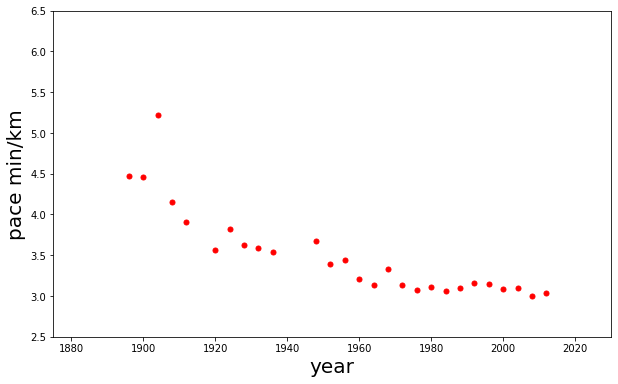

In [16]:

xlim = (1875,2030)
ylim = (2.5, 6.5)
yhat = (y-offset)/scale

fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x, y, 'r.',markersize=10)
ax.set_xlabel('year', fontsize=20)
ax.set_ylabel('pace min/km', fontsize=20)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

mlai.write_figure(figure=fig, 
                  filename='../slides/diagrams/datasets/olympic-marathon.svg', 
                  transparent=True, 
                  frameon=True)

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/datasets/olympic-marathon.svg" class="" align="" style="vertical-align:middle;">

Figure: <i>Olympic marathon pace times since 1892.</i>

Things to notice about the data include the outlier in 1904, in this
year, the olympics was in St Louis, USA. Organizational problems and
challenges with dust kicked up by the cars following the race meant that
participants got lost, and only very few participants completed.

More recent years see more consistently quick marathons.

## Alan Turing \[<a href="https://github.com/lawrennd/talks/edit/gh-pages/_ml/includes/alan-turing-marathon.md" target="_blank" >edit</a>\]

<table>
<tr>
<td width="50%">
<img class="" src="http://inverseprobability.com/talks/slides/../slides/diagrams/turing-times.gif" style="width:100%">
</td>
<td width="50%">
<img class="" src="http://inverseprobability.com/talks/slides/../slides/diagrams/turing-run.jpg" style="width:50%">
</td>
</tr>
</table>
Figure: <i>Alan Turing, in 1946 he was only 11 minutes slower than the
winner of the 1948 games. Would he have won a hypothetical games held in
1946? Source: [Alan Turing Internet
Scrapbook](http://www.turing.org.uk/scrapbook/run.html).</i>

If we had to summarise the objectives of machine learning in one word, a
very good candidate for that word would be *generalization*. What is
generalization? From a human perspective it might be summarised as the
ability to take lessons learned in one domain and apply them to another
domain. If we accept the definition given in the first session for
machine learning, $$
\text{data} + \text{model} \xrightarrow{\text{compute}} \text{prediction}
$$ then we see that without a model we can't generalise: we only have
data. Data is fine for answering very specific questions, like "Who won
the Olympic Marathon in 2012?", because we have that answer stored,
however, we are not given the answer to many other questions. For
example, Alan Turing was a formidable marathon runner, in 1946 he ran a
time 2 hours 46 minutes (just under four minutes per kilometer, faster
than I and most of the other [Endcliffe Park
Run](http://www.parkrun.org.uk/sheffieldhallam/) runners can do 5 km).
What is the probability he would have won an Olympics if one had been
held in 1946?

To answer this question we need to generalize, but before we formalize
the concept of generalization let's introduce some formal representation
of what it means to generalize in machine learning.

Our first objective will be to perform a Gaussian process fit to the
data, we'll do this using the [GPy
software](https://github.com/SheffieldML/GPy).

In [17]:
import GPy

In [18]:
m_full = GPy.models.GPRegression(x,yhat)
_ = m_full.optimize() # Optimize parameters of covariance function

The first command sets up the model, then `m_full.optimize()` optimizes
the parameters of the covariance function and the noise level of the
model. Once the fit is complete, we'll try creating some test points,
and computing the output of the GP model in terms of the mean and
standard deviation of the posterior functions between 1870 and 2030. We
plot the mean function and the standard deviation at 200 locations. We
can obtain the predictions using `y_mean, y_var = m_full.predict(xt)`

In [19]:
xt = np.linspace(1870,2030,200)[:,np.newaxis]
yt_mean, yt_var = m_full.predict(xt)
yt_sd=np.sqrt(yt_var)

Now we plot the results using the helper function in `teaching_plots`.

In [20]:
import teaching_plots as plot

FileNotFoundError: [Errno 2] No such file or directory: '../slides/diagrams/gp/olympic-marathon-gp.svg'

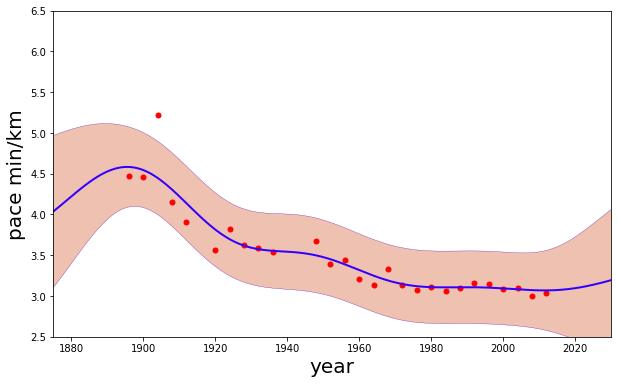

In [21]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m_full, scale=scale, offset=offset, ax=ax, xlabel='year', ylabel='pace min/km', fontsize=20, portion=0.2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
mlai.write_figure(figure=fig,
                  filename='../slides/diagrams/gp/olympic-marathon-gp.svg', 
                  transparent=True, frameon=True)

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/gp/olympic-marathon-gp.svg" class="" align="" style="vertical-align:middle;">

Figure: <i>Gaussian process fit to the Olympic Marathon data. The error
bars are too large, perhaps due to the outlier from 1904.</i>

## Fit Quality

In the fit we see that the error bars (coming mainly from the noise
variance) are quite large. This is likely due to the outlier point in
1904, ignoring that point we can see that a tighter fit is obtained. To
see this making a version of the model, `m_clean`, where that point is
removed.

In [22]:
x_clean=np.vstack((x[0:2, :], x[3:, :]))
y_clean=np.vstack((y[0:2, :], y[3:, :]))

m_clean = GPy.models.GPRegression(x_clean,y_clean)
_ = m_clean.optimize()

## Deep GP Fit \[<a href="https://github.com/lawrennd/talks/edit/gh-pages/_deepgp/includes/deep-olympic.md" target="_blank" >edit</a>\]

Let's see if a deep Gaussian process can help here. We will construct a
deep Gaussian process with one hidden layer (i.e. one Gaussian process
feeding into another).

Build a Deep GP with an additional hidden layer (one dimensional) to fit
the model.

In [27]:
import os
from sys import path

# Add parent directory to path if deepgp is not there already
pwd = os.getcwd()
base_path = pwd[0:pwd.rfind(os.sep)]
path.insert(0,base_path)

In [28]:
import GPy
import deepgp

In [29]:
hidden = 1
m = deepgp.DeepGP([y.shape[1],hidden,x.shape[1]],Y=yhat, X=x, inits=['PCA','PCA'], 
                  kernels=[GPy.kern.RBF(hidden,ARD=True),
                           GPy.kern.RBF(x.shape[1],ARD=True)], # the kernels for each layer
                  num_inducing=50, back_constraint=False)

In [30]:
import deepgp

In [32]:
# Call the initalization
#m.initialize()

Now optimize the model.

In [36]:
for layer in m.layers:
    layer.likelihood.variance.constrain_positive(warning=False)
m.optimize(messages=True,max_iters=10000)

In [37]:
m.staged_optimize(messages=(True,True,True))

AttributeError: 'DeepGP' object has no attribute 'staged_optimize'

## Olympic Marathon Data Deep GP

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/deepgp/olympic-marathon-deep-gp.svg" class="" align="100%" style="vertical-align:middle;">

Figure: <i>Deep GP fit to the Olympic marathon data. Error bars now
change as the prediction evolves.</i>

AttributeError: 'DeepGP' object has no attribute 'posterior_sample'

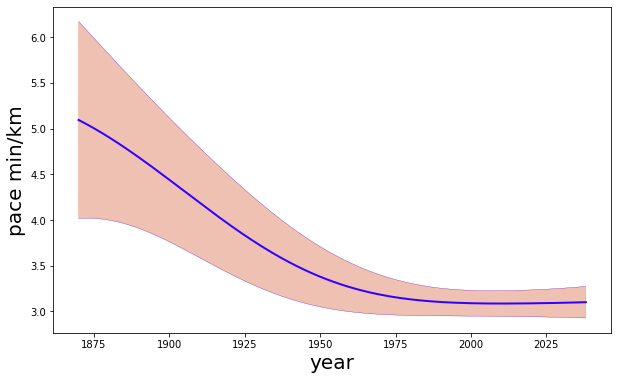

In [38]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_sample(m, scale=scale, offset=offset, samps=10, ax=ax, 
                  xlabel='year', ylabel='pace min/km', portion = 0.225)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
mlai.write_figure(figure=fig, filename='../slides/diagrams/deepgp/olympic-marathon-deep-gp-samples.svg', 
                  transparent=True, frameon=True)

## Olympic Marathon Data Deep GP

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/deepgp/olympic-marathon-deep-gp-samples.svg" class="" align="" style="vertical-align:middle;">

Figure: <i>Point samples run through the deep Gaussian process show the
distribution of output locations.</i>

## Fitted GP for each layer

Now we explore the GPs the model has used to fit each layer. First of
all, we look at the hidden layer.

In [39]:
m.visualize(scale=scale, offset=offset, xlabel='year',
            ylabel='pace min/km',xlim=xlim, ylim=ylim,
            dataset='olympic-marathon',
            diagrams='../slides/diagrams/deepgp')

AttributeError: 'DeepGP' object has no attribute 'visualize'

In [40]:
import pods

In [41]:
pods.notebook.display_plots('olympic-marathon-deep-gp-layer-{sample:0>1}.svg', 
                            '../slides/diagrams/deepgp', sample=(0,1))

AttributeError: module 'pods.notebook' has no attribute 'display_plots'

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/deepgp/olympic-marathon-deep-gp-layer-0.svg" class="" align="" style="vertical-align:middle;">

Figure: <i>The mapping from input to the latent layer is broadly, with
some flattening as time goes on. Variance is high across the input
range.</i>

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/deepgp/olympic-marathon-deep-gp-layer-1.svg" class="" align="" style="vertical-align:middle;">

Figure: <i>The mapping from the latent layer to the output layer.</i>

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
m.visualize_pinball(ax=ax, scale=scale, offset=offset, points=30, portion=0.1,
                    xlabel='year', ylabel='pace km/min', vertical=True)
mlai.write_figure(figure=fig, filename='../slides/diagrams/deepgp/olympic-marathon-deep-gp-pinball.svg', 
                  transparent=True, frameon=True)

## Olympic Marathon Pinball Plot

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/deepgp/olympic-marathon-deep-gp-pinball.svg" class="" align="80%" style="vertical-align:middle;">

Figure: <i>A pinball plot shows the movement of the 'ball' as it passes
through each layer of the Gaussian processes. Mean directions of
movement are shown by lines. Shading gives one standard deviation of
movement position. At each layer, the uncertainty is reset. The overal
uncertainty is the cumulative uncertainty from all the layers. There is
some grouping of later points towards the right in the first layer,
which also injects a large amount of uncertainty. Due to flattening of
the curve in the second layer towards the right the uncertainty is
reduced in final output.</i>

The pinball plot shows the flow of any input ball through the deep
Gaussian process. In a pinball plot a series of vertical parallel lines
would indicate a purely linear function. For the olypmic marathon data
we can see the first layer begins to shift from input towards the right.
Note it also does so with some uncertainty (indicated by the shaded
backgrounds). The second layer has less uncertainty, but bunches the
inputs more strongly to the right. This input layer of uncertainty,
followed by a layer that pushes inputs to the right is what gives the
heteroschedastic noise.

## Gene Expression Example \[<a href="https://github.com/lawrennd/talks/edit/gh-pages/_gp/includes/della-gatta-gene-gp.md" target="_blank" >edit</a>\]

We now consider an example in gene expression. Gene expression is the
measurement of mRNA levels expressed in cells. These mRNA levels show
which genes are 'switched on' and producing data. In the example we will
use a Gaussian process to determine whether a given gene is active, or
we are merely observing a noise response.

## Della Gatta Gene Data \[<a href="https://github.com/lawrennd/talks/edit/gh-pages/_ml/includes/della-gatta-gene-data.md" target="_blank" >edit</a>\]

-   Given given expression levels in the form of a time series from
    @DellaGatta:direct08.

In [42]:
import numpy as np
import pods

In [43]:
data = pods.datasets.della_gatta_TRP63_gene_expression(data_set='della_gatta',gene_number=937)

x = data['X']
y = data['Y']

offset = y.mean()
scale = np.sqrt(y.var())

Acquiring resource: della_gatta

Details of data: 
The full gene expression data set from della Gatta et al (http://www.ncbi.nlm.nih.gov/pmc/articles/PMC2413161/) processed by RMA.

Please cite:
Direct targets of the TRP63 transcription factor revealed by a combination of gene expression profiling and reverse engineering. Giusy Della Gatta, Mukesh Bansal, Alberto Ambesi-Impiombato, Dario Antonini, Caterina Missero, and Diego di Bernardo, Genome Research 2008

After downloading the data will take up 3729650 bytes of space.

Data will be stored in C:\Users\33617/ods_data_cache/della_gatta.

Do you wish to proceed with the download? [yes/no]
yes


[===========                   ]   1.344/3.557MB                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [44]:
import matplotlib.pyplot as plt
import teaching_plots as plot
import mlai

(5, 7.5)

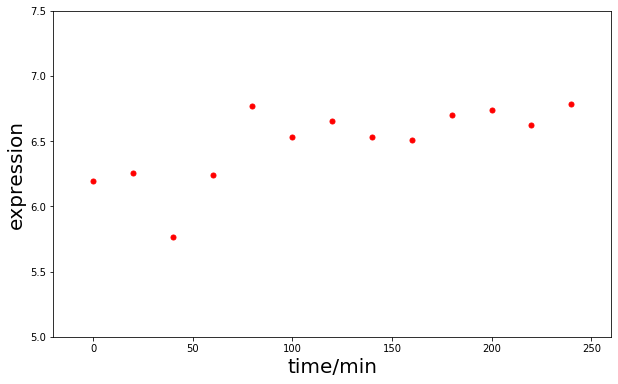

In [46]:

xlim = (-20,260)
ylim = (5, 7.5)
yhat = (y-offset)/scale

fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x, y, 'r.',markersize=10)
ax.set_xlabel('time/min', fontsize=20)
ax.set_ylabel('expression', fontsize=20)
ax.set_xlim(xlim)
ax.set_ylim(ylim)



<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/datasets/della-gatta-gene.svg" class="" align="80%" style="vertical-align:middle;">

Figure: <i>Gene expression levels over time for a gene from data
provided by @DellaGatta:direct08. We would like to understand whethere
there is signal in the data, or we are only observing noise.</i>

-   Want to detect if a gene is expressed or not, fit a GP to each gene
    @Kalaitzis:simple11.

<img class="" src="http://inverseprobability.com/talks/slides/../slides/diagrams/health/1471-2105-12-180_1.png" style="width:80%">

Figure: <i>The example is taken from the paper "A Simple Approach to
Ranking Differentially Expressed Gene Expression Time Courses through
Gaussian Process Regression." @Kalaitzis:simple11.</i>

<center>
<http://www.biomedcentral.com/1471-2105/12/180>
</center>
Our first objective will be to perform a Gaussian process fit to the
data, we'll do this using the [GPy
software](https://github.com/SheffieldML/GPy).

In [47]:
import GPy

In [48]:
m_full = GPy.models.GPRegression(x,yhat)
m_full.kern.lengthscale=50
_ = m_full.optimize() # Optimize parameters of covariance function

Initialize the length scale parameter (which here actually represents a
*time scale* of the covariance function) to a reasonable value. Default
would be 1, but here we set it to 50 minutes, given points are arriving
across zero to 250 minutes.

In [49]:
xt = np.linspace(-20,260,200)[:,np.newaxis]
yt_mean, yt_var = m_full.predict(xt)
yt_sd=np.sqrt(yt_var)

Now we plot the results using the helper function in `teaching_plots`.

In [50]:
import teaching_plots as plot

Text(0.5, 1.0, 'log likelihood: -16.6')

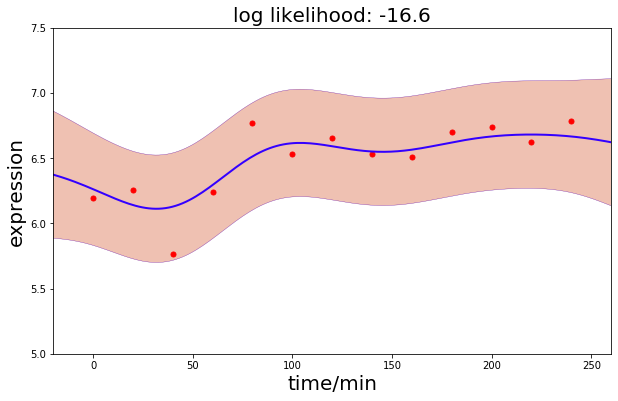

In [52]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m_full, scale=scale, offset=offset, ax=ax, xlabel='time/min', ylabel='expression', fontsize=20, portion=0.2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('log likelihood: {ll:.3}'.format(ll=m_full.log_likelihood()), fontsize=20)


<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/gp/della-gatta-gene-gp.svg" class="" align="80%" style="vertical-align:middle;">

Figure: <i>Result of the fit of the Gaussian process model with the time
scale parameter initialized to 50 minutes.</i>

Now we try a model initialized with a longer length scale.

In [ ]:
m_full2 = GPy.models.GPRegression(x,yhat)
m_full2.kern.lengthscale=2000
_ = m_full2.optimize() # Optimize parameters of covariance function

In [ ]:
import teaching_plots as plot

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m_full2, scale=scale, offset=offset, ax=ax, xlabel='time/min', ylabel='expression', fontsize=20, portion=0.2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('log likelihood: {ll:.3}'.format(ll=m_full2.log_likelihood()), fontsize=20)
mlai.write_figure(figure=fig,
                  filename='../slides/diagrams/gp/della-gatta-gene-gp2.svg', 
                  transparent=True, frameon=True)

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/gp/della-gatta-gene-gp2.svg" class="" align="80%" style="vertical-align:middle;">

Figure: <i>Result of the fit of the Gaussian process model with the time
scale parameter initialized to 2000 minutes.</i>

Now we try a model initialized with a lower noise.

In [ ]:
m_full3 = GPy.models.GPRegression(x,yhat)
m_full3.kern.lengthscale=20
m_full3.likelihood.variance=0.001
_ = m_full3.optimize() # Optimize parameters of covariance function

In [ ]:
import teaching_plots as plot

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m_full3, scale=scale, offset=offset, ax=ax, xlabel='time/min', ylabel='expression', fontsize=20, portion=0.2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('log likelihood: {ll:.3}'.format(ll=m_full3.log_likelihood()), fontsize=20)
mlai.write_figure(figure=fig,
                  filename='../slides/diagrams/gp/della-gatta-gene-gp3.svg', 
                  transparent=True, frameon=True)

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/gp/della-gatta-gene-gp3.svg" class="" align="80%" style="vertical-align:middle;">

Figure: <i>Result of the fit of the Gaussian process model with the
noise initialized low (standard deviation 0.1) and the time scale
parameter initialized to 20 minutes.</i>

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/gp/multiple-optima000.svg" class="" align="50%" style="vertical-align:middle;">

Figure: <i></i>

<!--

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/gp/multiple-optima001.svg" class="" align="" style="vertical-align:middle;">-->

In [53]:
layers = [y.shape[1], 1,x.shape[1]]
inits = ['PCA']*(len(layers)-1)
kernels = []
for i in layers[1:]:
    kernels += [GPy.kern.RBF(i)]
m = deepgp.DeepGP(layers,Y=yhat, X=x, 
                  inits=inits, 
                  kernels=kernels, # the kernels for each layer
                  num_inducing=20, back_constraint=False)

In [56]:
#m.initialize()
m.optimize()

(-20, 260)

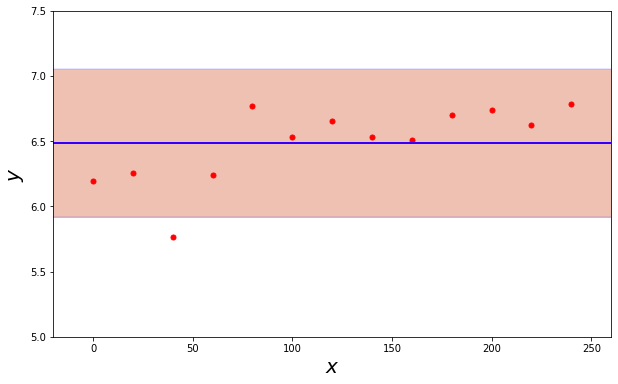

In [58]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m, scale=scale, offset=offset, ax=ax, fontsize=20, portion=0.5)
ax.set_ylim(ylim)
ax.set_xlim(xlim)

## Della Gatta Gene Data Deep GP

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/deepgp/della-gatta-gene-deep-gp.svg" class="" align="80%" style="vertical-align:middle;">

Figure: <i>Deep Gaussian process fit to the Della Gatta gene expression
data.</i>

In [ ]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
plot.model_sample(m, scale=scale, offset=offset, samps=10, ax=ax, portion = 0.5)
ax.set_ylim(ylim)
ax.set_xlim(xlim)
mlai.write_figure(figure=fig, filename='../slides/diagrams/deepgp/della-gatta-gene-deep-gp-samples.svg', 
                  transparent=True, frameon=True)

## Della Gatta Gene Data Deep GP

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/deepgp/della-gatta-gene-deep-gp-samples.svg" class="" align="" style="vertical-align:middle;">

Figure: <i>Deep Gaussian process samples fitted to the Della Gatta gene
expression data.</i>

In [ ]:
m.visualize(offset=offset, scale=scale, xlim=xlim, ylim=ylim,
            dataset='della-gatta-gene',
            diagrams='../slides/diagrams/deepgp')

## Della Gatta Gene Data Latent 1

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/deepgp/della-gatta-gene-deep-gp-layer-0.svg" class="" align="50%" style="vertical-align:middle;">

Figure: <i>Gaussian process mapping from input to latent layer for the
della Gatta gene expression data.</i>

## Della Gatta Gene Data Latent 2

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/deepgp/della-gatta-gene-deep-gp-layer-1.svg" class="" align="50%" style="vertical-align:middle;">

Figure: <i>Gaussian process mapping from latent to output layer for the
della Gatta gene expression data.</i>

In [ ]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
m.visualize_pinball(offset=offset, ax=ax, scale=scale, xlim=xlim, ylim=ylim, portion=0.1, points=50)
mlai.write_figure(figure=fig, filename='../slides/diagrams/deepgp/della-gatta-gene-deep-gp-pinball.svg', 
                  transparent=True, frameon=True, ax=ax)

## TP53 Gene Pinball Plot

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/deepgp/della-gatta-gene-deep-gp-pinball.svg" class="" align="60%" style="vertical-align:middle;">

Figure: <i>A pinball plot shows the movement of the 'ball' as it passes
through each layer of the Gaussian processes. Mean directions of
movement are shown by lines. Shading gives one standard deviation of
movement position. At each layer, the uncertainty is reset. The overal
uncertainty is the cumulative uncertainty from all the layers. Pinball
plot of the della Gatta gene expression data.</i>

## Step Function \[<a href="https://github.com/lawrennd/talks/edit/gh-pages/_ml/includes/step-function-data.md" target="_blank" >edit</a>\]

Next we consider a simple step function data set.

In [ ]:
num_low=25
num_high=25
gap = -.1
noise=0.0001
x = np.vstack((np.linspace(-1, -gap/2.0, num_low)[:, np.newaxis],
              np.linspace(gap/2.0, 1, num_high)[:, np.newaxis]))
y = np.vstack((np.zeros((num_low, 1)), np.ones((num_high,1))))
scale = np.sqrt(y.var())
offset = y.mean()
yhat = (y-offset)/scale

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x, y, 'r.',markersize=10)
_ = ax.set_xlabel('$x$', fontsize=20)
_ = ax.set_ylabel('$y$', fontsize=20)
xlim = (-2, 2)
ylim = (-0.6, 1.6)
ax.set_ylim(ylim)
ax.set_xlim(xlim)
mlai.write_figure(figure=fig, filename='../../slides/diagrams/datasets/step-function.svg', 
            transparent=True, frameon=True)

## Step Function Data

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/datasets/step-function.svg" class="" align="80%" style="vertical-align:middle;">

Figure: <i>Simulation study of step function data artificially
generated. Here there is a small overlap between the two lines.</i>

## Step Function Data GP

We can fit a Gaussian process to the step function data using `GPy` as
follows.

In [ ]:
m_full = GPy.models.GPRegression(x,yhat)
_ = m_full.optimize() # Optimize parameters of covariance function

Where `GPy.models.GPRegression()` gives us a standard GP regression
model with exponentiated quadratic covariance function.

The model is optimized using `m_full.optimize()` which calls an L-BGFS
gradient based solver in python.

In [ ]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m_full, scale=scale, offset=offset, ax=ax, fontsize=20, portion=0.5)
ax.set_ylim(ylim)
ax.set_xlim(xlim)

mlai.write_figure(figure=fig,filename='../slides/diagrams/gp/step-function-gp.svg', 
            transparent=True, frameon=True)

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/gp/step-function-gp.svg" class="" align="80%" style="vertical-align:middle;">

Figure: <i>Gaussian process fit to the step function data. Note the
large error bars and the over-smoothing of the discontinuity. Error bars
are shown at two standard deviations.</i>

The resulting fit to the step function data shows some challenges. In
particular, the over smoothing at the discontinuity. If we know how many
discontinuities there are, we can parameterize them in the step
function. But by doing this, we form a semi-parametric model. The
parameters indicate how many discontinuities are, and where they are.
They can be optimized as part of the model fit. But if new, unforeseen,
discontinuities arise when the model is being deployed in practice,
these won't be accounted for in the predictions.

## Step Function Data Deep GP

First we initialize a deep Gaussian process with three latent layers
(four layers total). Within each layer we create a GP with an
exponentiated quadratic covariance (`GPy.kern.RBF`).

At each layer we use 20 inducing points for the variational
approximation.

In [ ]:
layers = [y.shape[1], 1, 1, 1,x.shape[1]]
inits = ['PCA']*(len(layers)-1)
kernels = []
for i in layers[1:]:
    kernels += [GPy.kern.RBF(i)]
    
m = deepgp.DeepGP(layers,Y=yhat, X=x, 
                  inits=inits, 
                  kernels=kernels, # the kernels for each layer
                  num_inducing=20, back_constraint=False)

Once the model is constructed we initialize the parameters, and perform
the staged optimization which starts by optimizing variational
parameters with a low noise and proceeds to optimize the whole model.

In [ ]:
m.initialize()
m.staged_optimize()

We plot the output of the deep Gaussian process fitted to the stpe data
as follows.

In [ ]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m, scale=scale, offset=offset, ax=ax, fontsize=20, portion=0.5)
ax.set_ylim(ylim)
ax.set_xlim(xlim)
mlai.write_figure(filename='../slides/diagrams/deepgp/step-function-deep-gp.svg', 
            transparent=True, frameon=True)

The deep Gaussian process does a much better job of fitting the data. It
handles the discontinuity easily, and error bars drop to smaller values
in the regions of data.

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/deepgp/step-function-deep-gp.svg" class="" align="80%" style="vertical-align:middle;">

Figure: <i>Deep Gaussian process fit to the step function data.</i>

## Step Function Data Deep GP

The samples of the model can be plotted with the helper function from
`teaching_plots.py`, `model_sample`

In [ ]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)

plot.model_sample(m, scale=scale, offset=offset, samps=10, ax=ax, portion = 0.5)
ax.set_ylim(ylim)
ax.set_xlim(xlim)
mlai.write_figure(figure=fig, filename='../slides/diagrams/deepgp/step-function-deep-gp-samples.svg', 
                  transparent=True, frameon=True)

The samples from the model show that the error bars, which are
informative for Gaussian outputs, are less informative for this model.
They make clear that the data points lie, in output mainly at 0 or 1, or
occasionally in between.

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/deepgp/step-function-deep-gp-samples.svg" class="" align="80%" style="vertical-align:middle;">

Figure: <i>Samples from the deep Gaussian process model for the step
function fit.</i>

The visualize code allows us to inspect the intermediate layers in the
deep GP model to understand how it has reconstructed the step function.

In [ ]:
m.visualize(offset=offset, scale=scale, xlim=xlim, ylim=ylim,
            dataset='step-function',
            diagrams='../slides/diagrams/deepgp')

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/deepgp/step-function-deep-gp-layer-0.svg" class="" align="60%" style="vertical-align:middle;">
<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/deepgp/step-function-deep-gp-layer-1.svg" class="" align="60%" style="vertical-align:middle;">
<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/deepgp/step-function-deep-gp-layer-2.svg" class="" align="60%" style="vertical-align:middle;">
<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/deepgp/step-function-deep-gp-layer-3.svg" class="" align="60%" style="vertical-align:middle;">

Figure: <i>From top to bottom, the Gaussian process mapping function
that makes up each layer of the resulting deep Gaussian process.</i>

A pinball plot can be created for the resulting model to understand how
the input is being translated to the output across the different layers.

In [ ]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
m.visualize_pinball(offset=offset, ax=ax, scale=scale, xlim=xlim, ylim=ylim, portion=0.1, points=50)
mlai.write_figure(figure=fig, filename='../slides/diagrams/deepgp/step-function-deep-gp-pinball.svg', 
                  transparent=True, frameon=True, ax=ax)

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/deepgp/step-function-deep-gp-pinball.svg" class="" align="60%" style="vertical-align:middle;">

Figure: <i>Pinball plot of the deep GP fitted to the step function data.
Each layer of the model pushes the 'ball' towards the left or right,
saturating at 1 and 0. This causes the final density to be be peaked at
0 and 1. Transitions occur driven by the uncertainty of the mapping in
each layer.</i>

In [ ]:
import pods

In [ ]:
data = pods.datasets.mcycle()
x = data['X']
y = data['Y']
scale=np.sqrt(y.var())
offset=y.mean()
yhat = (y - offset)/scale

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x, y, 'r.',markersize=10)
_ = ax.set_xlabel('time', fontsize=20)
_ = ax.set_ylabel('acceleration', fontsize=20)
xlim = (-20, 80)
ylim = (-175, 125)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
mlai.write_figure(filename='../slides/diagrams/datasets/motorcycle-helmet.svg', 
            transparent=True, frameon=True)

## Motorcycle Helmet Data \[<a href="https://github.com/lawrennd/talks/edit/gh-pages/_ml/includes/motorcycle-helmet-data.md" target="_blank" >edit</a>\]

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/datasets/motorcycle-helmet.svg" class="" align="80%" style="vertical-align:middle;">

Figure: <i>Motorcycle helmet data. The data consists of acceleration
readings on a motorcycle helmet undergoing a collision. The data
exhibits heteroschedastic (time varying) noise levles and
non-stationarity.</i>

In [ ]:
m_full = GPy.models.GPRegression(x,yhat)
_ = m_full.optimize() # Optimize parameters of covariance function

## Motorcycle Helmet Data GP

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/gp/motorcycle-helmet-gp.svg" class="" align="80%" style="vertical-align:middle;">

Figure: <i>Gaussian process fit to the motorcycle helmet accelerometer
data.</i>

In [ ]:
import deepgp

In [ ]:
layers = [y.shape[1], 1, x.shape[1]]
inits = ['PCA']*(len(layers)-1)
kernels = []
for i in layers[1:]:
    kernels += [GPy.kern.RBF(i)]
m = deepgp.DeepGP(layers,Y=yhat, X=x, 
                  inits=inits, 
                  kernels=kernels, # the kernels for each layer
                  num_inducing=20, back_constraint=False)



m.initialize()

In [ ]:
m.staged_optimize(iters=(1000,1000,10000), messages=(True, True, True))

In [ ]:
import teaching_plots as plot
import mlai

In [ ]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m, scale=scale, offset=offset, ax=ax, xlabel='time', ylabel='acceleration/$g$', fontsize=20, portion=0.5)
ax.set_ylim(ylim)
ax.set_xlim(xlim)
mlai.write_figure(filename='../slides/diagrams/deepgp/motorcycle-helmet-deep-gp.svg', 
            transparent=True, frameon=True)

## Motorcycle Helmet Data Deep GP

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/deepgp/motorcycle-helmet-deep-gp.svg" class="" align="80%" style="vertical-align:middle;">

Figure: <i>Deep Gaussian process fit to the motorcycle helmet
accelerometer data.</i>

In [ ]:
import teaching_plots as plot
import mlai

In [ ]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
plot.model_sample(m, scale=scale, offset=offset, samps=10, ax=ax, xlabel='time', ylabel='acceleration/$g$', portion = 0.5)
ax.set_ylim(ylim)
ax.set_xlim(xlim)

mlai.write_figure(figure=fig, filename='../slides/diagrams/deepgp/motorcycle-helmet-deep-gp-samples.svg', 
                  transparent=True, frameon=True)

## Motorcycle Helmet Data Deep GP

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/deepgp/motorcycle-helmet-deep-gp-samples.svg" class="" align="80%" style="vertical-align:middle;">

Figure: <i>Samples from the deep Gaussian process as fitted to the
motorcycle helmet accelerometer data.</i>

In [ ]:
m.visualize(xlim=xlim, ylim=ylim, scale=scale,offset=offset, 
            xlabel="time", ylabel="acceleration/$g$", portion=0.5,
            dataset='motorcycle-helmet',
            diagrams='../slides/diagrams/deepgp')

## Motorcycle Helmet Data Latent 1

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/deepgp/motorcycle-helmet-deep-gp-layer-0.svg" class="" align="60%" style="vertical-align:middle;">

Figure: <i>Mappings from the input to the latent layer for the
motorcycle helmet accelerometer data.</i>

## Motorcycle Helmet Data Latent 2

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/deepgp/motorcycle-helmet-deep-gp-layer-1.svg" class="" align="60%" style="vertical-align:middle;">

Figure: <i>Mappings from the latent layer to the output layer for the
motorcycle helmet accelerometer data.</i>

In [ ]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
m.visualize_pinball(ax=ax, xlabel='time', ylabel='acceleration/g', 
                    points=50, scale=scale, offset=offset, portion=0.1)
mlai.write_figure(figure=fig, filename='../slides/diagrams/deepgp/motorcycle-helmet-deep-gp-pinball.svg', 
                  transparent=True, frameon=True)

## Motorcycle Helmet Pinball Plot

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/deepgp/motorcycle-helmet-deep-gp-pinball.svg" class="" align="60%" style="vertical-align:middle;">

Figure: <i>Pinball plot for the mapping from input to output layer for
the motorcycle helmet accelerometer data.</i>

## Motion Capture \[<a href="https://github.com/lawrennd/talks/edit/gh-pages/_deepgp/includes/deep-high-five.md" target="_blank" >edit</a>\]

-   'High five' data.
-   Model learns structure between two interacting subjects.

## Shared LVM

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/shared.svg" class="" align="60%" style="vertical-align:middle;">

Figure: <i>Shared latent variable model structure. Here two related data
sets are brought together with a set of latent variables that are
partially shared and partially specific to one of the data sets.</i>

<img class="" src="http://inverseprobability.com/talks/slides/../slides/diagrams/deep-gp-high-five2.png" style="width:80%">

Figure: <i>Latent spaces of the 'high five' data. The structure of the
model is automatically learnt. One of the latent spaces is coordinating
how the two figures walk together, the other latent spaces contain
latent variables that are specific to each of the figures
separately.</i>

## Fitting a GP to the USPS Digits Data \[<a href="https://github.com/lawrennd/talks/edit/gh-pages/_deepgp/includes/deep-usps-digits.md" target="_blank" >edit</a>\]

<small>[Thanks to: Zhenwen Dai and Neil D.
Lawrence]{style="text-align:right"}</small>

We now look at the deep Gaussian processes' capacity to perform
unsupervised learning.

We will look at a sub-sample of the MNIST digit data set.

First load in the MNIST data set from scikit learn. This can take a
little while because it's large to download.

In [ ]:
from sklearn.datasets import fetch_mldata

In [ ]:
mnist = fetch_mldata('MNIST original')

Sub-sample the dataset to make the training faster.

In [ ]:
import numpy as np

In [ ]:
np.random.seed(0)
digits = [0,1,2,3,4]
N_per_digit = 100
Y = []
labels = []
for d in digits:
    imgs = mnist['data'][mnist['target']==d]
    Y.append(imgs[np.random.permutation(imgs.shape[0])][:N_per_digit])
    labels.append(np.ones(N_per_digit)*d)
Y = np.vstack(Y).astype(np.float64)
labels = np.hstack(labels)
Y /= 255.

## Fit a Deep GP

We're going to fit a Deep Gaussian process model to the MNIST data with
two hidden layers. Each of the two Gaussian processes (one from the
first hidden layer to the second, one from the second hidden layer to
the data) has an exponentiated quadratic covariance.

In [ ]:
import deepgp
import GPy

In [ ]:
num_latent = 2
num_hidden_2 = 5
m = deepgp.DeepGP([Y.shape[1],num_hidden_2,num_latent],
                  Y,
                  kernels=[GPy.kern.RBF(num_hidden_2,ARD=True), 
                           GPy.kern.RBF(num_latent,ARD=False)], 
                  num_inducing=50, back_constraint=False, 
                  encoder_dims=[[200],[200]])

## Initialization

Just like deep neural networks, there are some tricks to intitializing
these models. The tricks we use here include some early training of the
model with model parameters constrained. This gives the variational
inducing parameters some scope to tighten the bound for the case where
the noise variance is small and the variances of the Gaussian processes
are around 1.

In [ ]:
m.obslayer.likelihood.variance[:] = Y.var()*0.01
for layer in m.layers:
    layer.kern.variance.fix(warning=False)
    layer.likelihood.variance.fix(warning=False)

We now we optimize for a hundred iterations with the constrained model.

In [ ]:
m.optimize(messages=False,max_iters=100)

Now we remove the fixed constraint on the kernel variance parameters,
but keep the noise output constrained, and run for a further 100
iterations.

In [ ]:
for layer in m.layers:
    layer.kern.variance.constrain_positive(warning=False)
m.optimize(messages=False,max_iters=100)

Finally we unconstrain the layer likelihoods and allow the full model to
be trained for 1000 iterations.

In [ ]:
for layer in m.layers:
    layer.likelihood.variance.constrain_positive(warning=False)
m.optimize(messages=True,max_iters=10000)

## Visualize the latent space of the top layer

Now the model is trained, let's plot the mean of the posterior
distributions in the top latent layer of the model.

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
import teaching_plots as plot
import mlai

In [ ]:
rc("font", **{'family':'sans-serif','sans-serif':['Helvetica'],'size':20})
fig, ax = plt.subplots(figsize=plot.big_figsize)
for d in digits:
    ax.plot(m.layer_1.X.mean[labels==d,0],m.layer_1.X.mean[labels==d,1],'.',label=str(d))
_ = plt.legend()
mlai.write_figure(figure=fig, filename="../slides/diagrams/deepgp/usps-digits-latent.svg", transparent=True)

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/usps-digits-latent.svg" class="" align="60%" style="vertical-align:middle;">

Figure: <i>Latent space for the deep Gaussian process learned through
unsupervised learning and fitted to a subset of the USPS digit data.</i>

## Visualize the latent space of the intermediate layer

We can also visualize dimensions of the intermediate layer. First the
lengthscale of those dimensions is given by

In [ ]:
m.obslayer.kern.lengthscale

In [ ]:
import matplotlib.pyplot as plt
import mlai

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_figsize)
for i in range(5):
    for j in range(i):
        dims=[i, j]
        ax.cla()
        for d in digits:
            ax.plot(m.obslayer.X.mean[labels==d,dims[0]],
                 m.obslayer.X.mean[labels==d,dims[1]],
                 '.', label=str(d))
        plt.legend()
        plt.xlabel('dimension ' + str(dims[0]))
        plt.ylabel('dimension ' + str(dims[1]))
        mlai.write_figure(figure=fig, filename="../slides/diagrams/deepgp/usps-digits-hidden-" + str(dims[0]) + '-' + str(dims[1]) + '.svg', transparent=True)

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/usps-digits-hidden-1-0.svg" class="" align="60%" style="vertical-align:middle;">

Figure: <i>Visualisation of the intermediate layer, plot of dimension 1
vs dimension 0.</i>

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/usps-digits-hidden-2-0.svg" class="" align="60%" style="vertical-align:middle;">

Figure: <i>Visualisation of the intermediate layer, plot of dimension 1
vs dimension 0.</i>

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/usps-digits-hidden-3-0.svg" class="" align="60%" style="vertical-align:middle;">

Figure: <i>Visualisation of the intermediate layer, plot of dimension 1
vs dimension 0.</i>

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/usps-digits-hidden-4-0.svg" class="" align="60%" style="vertical-align:middle;">

Figure: <i>Visualisation of the intermediate layer, plot of dimension 1
vs dimension 0.</i>

## Generate From Model

Now we can take a look at a sample from the model, by drawing a Gaussian
random sample in the latent space and propagating it through the model.

In [ ]:

rows = 10
cols = 20
t=np.linspace(-1, 1, rows*cols)[:, None]
kern = GPy.kern.RBF(1,lengthscale=0.05)
cov = kern.K(t, t)
x = np.random.multivariate_normal(np.zeros(rows*cols), cov, num_latent).T

In [ ]:
import matplotlib.pyplot as plt
import mlai

In [ ]:
yt = m.predict(x)
fig, axs = plt.subplots(rows,cols,figsize=(10,6))
for i in range(rows):
    for j in range(cols):
        #v = np.random.normal(loc=yt[0][i*cols+j, :], scale=np.sqrt(yt[1][i*cols+j, :]))
        v = yt[0][i*cols+j, :]
        axs[i,j].imshow(v.reshape(28,28), 
                        cmap='gray', interpolation='none',
                        aspect='equal')
        axs[i,j].set_axis_off()
mlai.write_figure(figure=fig, filename="../slides/diagrams/deepgp/digit-samples-deep-gp.svg", transparent=True)

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/digit-samples-deep-gp.svg" class="" align="80%" style="vertical-align:middle;">

Figure: <i>These digits are produced by taking a tour of the two
dimensional latent space (as described by a Gaussian process sample) and
mapping the tour into the data space. We visualize the mean of the
mapping in the images.</i>

## Deep Health \[<a href="https://github.com/lawrennd/talks/edit/gh-pages/_health/includes/deep-health-model.md" target="_blank" >edit</a>\]

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/deep-health.svg" class="" align="70%" style="vertical-align:middle;">

Figure: <i>The deep health model uses different layers of abstraction in
the deep Gaussian process to represent information about diagnostics and
treatment to model interelationships between a patients different data
modalities.</i>

From a machine learning perspective, we'd like to be able to interrelate
all the different modalities that are informative about the state of the
disease. For deep health, the notion is that the state of the disease is
appearing at the more abstract levels, as we descend the model, we
express relationships between the more abstract concept, that sits
within the physician's mind, and the data we can measure.

# References {#references .unnumbered}